<a href="https://colab.research.google.com/github/Trodriguez238/PROGCOM-B/blob/main/NQ1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== DATOS DEL PROBLEMA ===
A = 500,000
G = 100,000
n = 20
i = 0.03

1) Factor uniforme = ((1 + 0.03)^20 - 1) / 0.03 = 26.870374
2) Parte del gradiente = (26.870374 - 20) = 6.870374

3) F = 500,000 * 26.870374 + (100,000/0.03) * (26.870374 - 20)
   F = $36,336,435.54

4) F_unico = 36,336,435.54 * (1 + 0.03)^(4) = $40,896,978


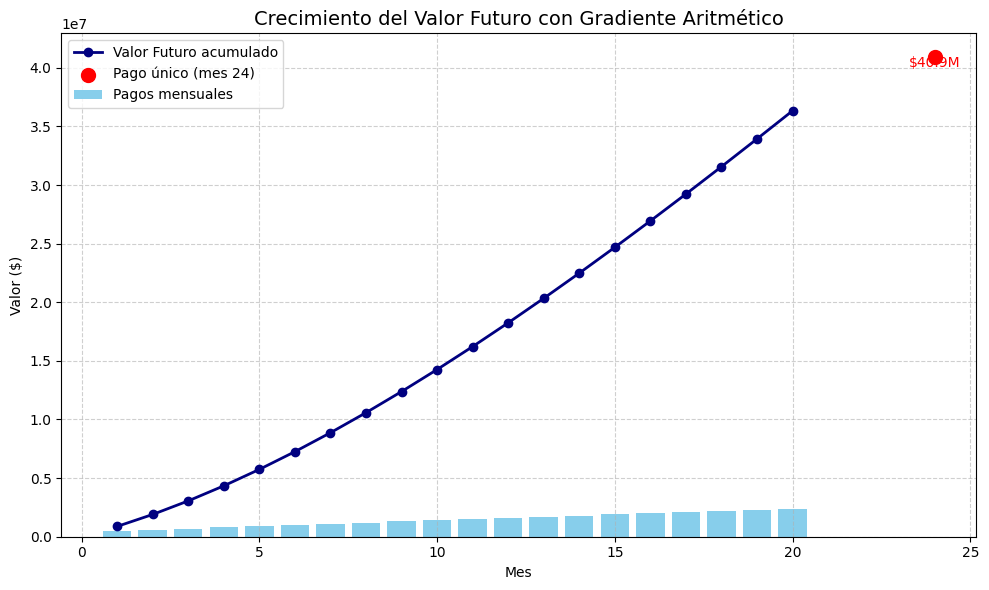

In [5]:
# ===========================================
# CÁLCULO DEL VALOR FUTURO CON LA FÓRMULA DEL GRADIENTE ARITMÉTICO
# ===========================================
import numpy as np
import matplotlib.pyplot as plt

# Datos del problema
A = 500_000      # primer pago ($)
G = 100_000      # incremento mensual ($)
n = 20           # número de pagos
i = 0.03         # tasa mensual (3%)

print("=== DATOS DEL PROBLEMA ===")
print(f"A = {A:,.0f}")
print(f"G = {G:,.0f}")
print(f"n = {n}")
print(f"i = {i:.2f}\n")

# -----------------------------
# Paso 1: Calcular el factor uniforme
# -----------------------------
factor = ((1 + i) ** n - 1) / i
print(f"1) Factor uniforme = ((1 + {i})^{n} - 1) / {i} = {factor:,.6f}")

# -----------------------------
# Paso 2: Calcular la parte del gradiente
# -----------------------------
gradiente_parte = (factor - n)
print(f"2) Parte del gradiente = ({factor:,.6f} - {n}) = {gradiente_parte:,.6f}")

# -----------------------------
# Paso 3: Aplicar la fórmula del valor futuro
# F = A * [(1+i)^n - 1]/i + (G/i)*([(1+i)^n - 1]/i - n)
# -----------------------------
F = A * factor + (G / i) * (factor - n)
print(f"\n3) F = {A:,.0f} * {factor:,.6f} + ({G:,.0f}/{i}) * ({factor:,.6f} - {n})")
print(f"   F = ${F:,.2f}")

# -----------------------------
# Paso 4: Calcular el valor único dentro de 24 meses
# F_unico = F * (1 + i)^(24 - n)
# -----------------------------
F_unico = F * (1 + i) ** (24 - n)
print(f"\n4) F_unico = {F:,.2f} * (1 + {i})^({24 - n}) = ${F_unico:,.0f}")

# ===========================================
# GRÁFICA DEL CRECIMIENTO
# ===========================================

# Crear vector de meses y pagos
meses = np.arange(1, n + 1)
pagos = A + (meses - 1) * G

# Calcular el valor futuro acumulado mes a mes
F_acumulado = [np.sum(pagos[:k] * (1 + i) ** (n - meses[:k])) for k in range(1, n + 1)]

# Graficar
plt.figure(figsize=(10,6))
plt.bar(meses, pagos, color='skyblue', label='Pagos mensuales')
plt.plot(meses, F_acumulado, color='navy', marker='o', linewidth=2, label='Valor Futuro acumulado')
plt.scatter(24, F_unico, color='red', s=100, zorder=5, label='Pago único (mes 24)')
plt.text(24, F_unico * 0.98, f"${F_unico/1_000_000:.1f}M", color='red', ha='center')

plt.title("Crecimiento del Valor Futuro con Gradiente Aritmético", fontsize=14)
plt.xlabel("Mes")
plt.ylabel("Valor ($)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
